In [1]:
from agent import Agent
from utils import compute_score_bounds, compute_continuity_noise, compute_contraction_noise
import numpy as np
import matplotlib.pyplot as plt

In [2]:
eta = np.array([3., 0.]).reshape(2, 1)
gamma = np.array([0.1, 1.]).reshape(2, 1)
min_eigenvalue = min(gamma)
agent = Agent(eta, gamma)
beta = np.array([1., 0.]).reshape(2, 1)
continuity_sigma = np.sqrt(1 / (2 * min_eigenvalue * (np.sqrt(2 * np.pi * np.e)))) + 0.05
contraction_sigma = np.sqrt(1 / (min_eigenvalue * (np.sqrt(2 * np.pi * np.e))))
discontinuity_sigma = 0.7
discontinuity_sigma_w_fp = 1.
bounds = compute_score_bounds(beta, discontinuity_sigma)
thresholds = np.linspace(bounds[0], bounds[1], 5000)

In [3]:
scores_brs_contraction = [np.matmul(beta.T, agent.best_response(beta, s, contraction_sigma)).item() for s in thresholds]
scores_brs_cont = [np.matmul(beta.T, agent.best_response(beta, s, continuity_sigma)).item() for s in thresholds]
scores_brs_discont = np.array([np.matmul(beta.T, agent.best_response(beta, s, discontinuity_sigma)).item() for s in thresholds])
good_idx = np.where(scores_brs_discont != 0)
scores_brs_discont_w_fp = np.array([np.matmul(beta.T, agent.best_response(beta, s, discontinuity_sigma_w_fp)).item() for s in thresholds])

/home/users/rsahoo/miniconda3/envs/py3/lib/python3.8/site-packages/scipy/optimize/zeros.py:459: RuntimeWarning: some failed to converge after 10000 iterations
  warnings.warn(msg, RuntimeWarning)


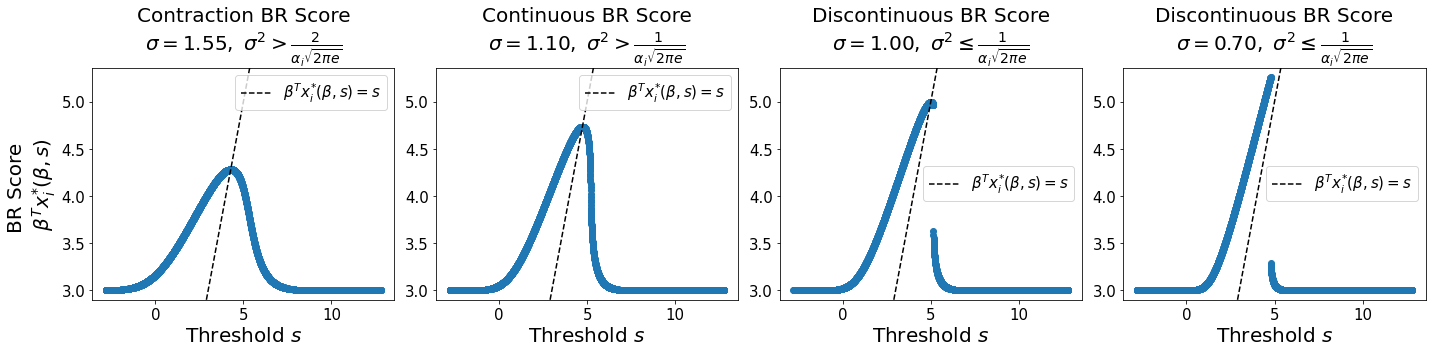

In [4]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharex=True)
line = np.linspace(min(scores_brs_discont[good_idx]) - 0.1, max(scores_brs_discont[good_idx]) + 0.1, 50)

ax[0].scatter(thresholds, scores_brs_contraction)
ax[0].set_title("Contraction BR Score\n" + r"$\sigma=1.55,$" + " " + r"$\sigma^{2}> \frac{2}{\alpha_{i}\sqrt{2\pi e}}$", fontsize=20)


ax[1].scatter(thresholds, scores_brs_cont)
ax[1].set_title("Continuous BR Score\n" + r"$\sigma=1.10,$"+ " " r"$\sigma^{2}> \frac{1}{\alpha_{i}\sqrt{2\pi e}}$", fontsize=20)


ax[2].scatter(thresholds, scores_brs_discont_w_fp)
ax[2].set_title("Discontinuous BR Score\n" + r"$\sigma=1.00,$"  + " " + r"$\sigma^{2} \leq \frac{1}{\alpha_{i}\sqrt{2\pi e}}$", fontsize=20)


ax[3].scatter(thresholds[good_idx], scores_brs_discont[good_idx])
ax[0].set_ylabel("BR Score \n" + r"$\beta^{T}x_{i}^{*}(\beta, s)$", fontsize=20)
ax[3].set_title("Discontinuous BR Score" + "\n" + r"$\sigma=0.70,$"  + " " + r"$\sigma^{2}\leq \frac{1}{\alpha_{i}\sqrt{2\pi e}}$", fontsize=20)

all_scores = scores_brs_cont + scores_brs_discont

max_score = max(max(scores_brs_discont), max(scores_brs_cont))+ 0.10
min_score = min(min(scores_brs_cont), min(scores_brs_cont)) - 0.10

ax[3].set_ylim(min_score , max_score )
ax[2].set_ylim(min_score , max_score )
ax[1].set_ylim(min_score , max_score )
ax[0].set_ylim(min_score , max_score )

for i in range(4):
    ax[i].set_xlabel("Threshold " + r"$s$", fontsize=20)
    ax[i].xaxis.set_tick_params(labelsize=15)
    ax[i].yaxis.set_tick_params(labelsize=15)
    ax[i].plot(line, line, "--", c="k", label=r"$\beta^{T}x_{i}^{*}(\beta, s) = s$")
    ax[i].legend(fontsize=15)


plt.tight_layout()
plt.savefig("figs/paper-figure-1.pdf")
